In [44]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [45]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

 
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)


In [46]:
## Display the images 

In [47]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5,0.5 )) + np.array((0.5,0.5,0.5 ))
  image = image.clip(0, 1)
  return image

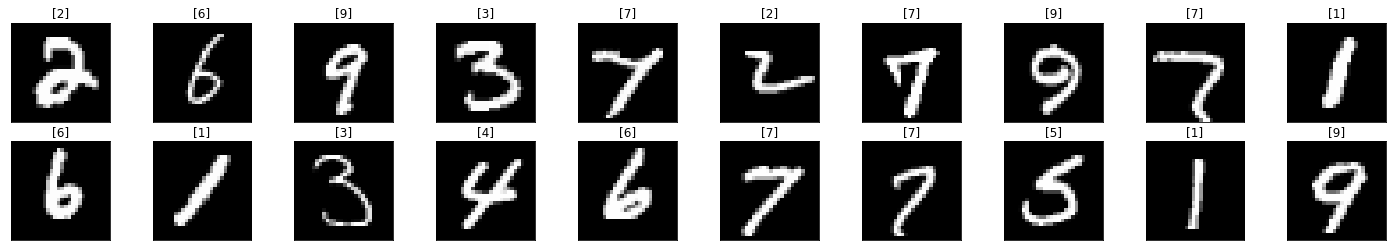

In [48]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [49]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super(Classifier,self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.linear2 = nn.Linear(H1, H2)
        self.dropout2 = nn.Dropout2d(0.25)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

In [50]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (dropout2): Dropout2d(p=0.25, inplace=False)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [52]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

In [53]:
for i in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    for input,labels in training_loader:
        inputs = input.view(input.shape[0],-1)
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _,pred = torch.max(outputs,1)
        running_corrects += torch.sum(pred == labels.data)
    else:
        with torch.no_grad():
          validtion_loss = 0.0
          running_correct_vaid = 0.0
          for val_inputs,val_labels in  validation_loader:
            val_inputs = val_inputs.view(val_inputs.shape[0],-1)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs,val_labels)
            _,pred = torch.max(outputs,1)
            running_correct_vaid  +=  torch.sum(pred == val_labels.data)
            validtion_loss +=  val_loss.item()   

        epoch_loss = running_loss / len(training_loader)
        running_corrects_data = running_corrects.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(running_corrects_data)
        print("training loss {:.4f}".format(epoch_loss))
        print("Correctvalue prediction {:.4f}".format(running_corrects_data))
        validation_loss_avg = validtion_loss  / len(validation_loader)
        running_correct_avg_val = running_correct_vaid  / len(validation_loader)
        val_running_loss_history.append(validation_loss_avg)
        val_running_corrects_history.append(running_correct_avg_val)
        print("Validation loss {:.4f}".format(validation_loss_avg))
        print("validation Correctvalue prediction {:.4f}".format(running_correct_avg_val))

training loss 1.1570
Correctvalue prediction 65.0617
Validation loss 0.6130
validation Correctvalue prediction 79.0000
training loss 0.5290
Correctvalue prediction 84.2100
Validation loss 0.4464
validation Correctvalue prediction 89.0000
training loss 0.4238
Correctvalue prediction 87.5117
Validation loss 0.3763
validation Correctvalue prediction 88.0000
training loss 0.3706
Correctvalue prediction 89.1250
Validation loss 0.3373
validation Correctvalue prediction 86.0000
training loss 0.3340
Correctvalue prediction 90.1483
Validation loss 0.3075
validation Correctvalue prediction 89.0000
training loss 0.3034
Correctvalue prediction 91.1467
Validation loss 0.2798
validation Correctvalue prediction 92.0000
training loss 0.2800
Correctvalue prediction 91.8667
Validation loss 0.2619
validation Correctvalue prediction 91.0000
training loss 0.2578
Correctvalue prediction 92.4667
Validation loss 0.2476
validation Correctvalue prediction 92.0000
training loss 0.2412
Correctvalue prediction 92.

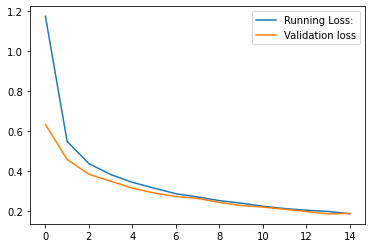

In [11]:
plt.plot(running_loss_history, label="Running Loss:")
plt.plot(val_running_loss_history,label="Validation loss")
plt.legend()
plt.show()

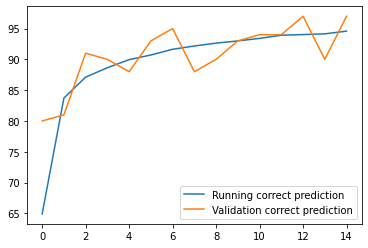

In [12]:
plt.plot(running_corrects_history, label="Running correct prediction")
plt.plot(val_running_corrects_history,label="Validation correct prediction")
plt.legend()
plt.show()

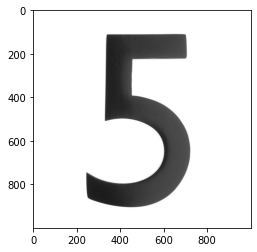

In [13]:
import requests
from PIL import Image 
url="https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg"
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)


In [14]:
import PIL.ImageOps

In [15]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)

In [16]:
img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())

5


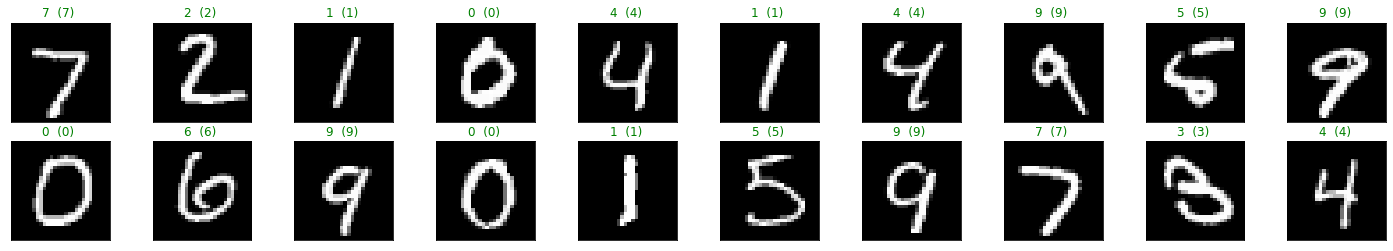

In [17]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images_ = images.view(images.shape[0],-1)
output = model(images_)
_,preds = torch.max(output,1)
fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{}  ({}) ".format(str(preds[idx].item()),str(labels[idx].item()) ) , color = ("green" if preds[idx] == labels[idx] else "red") )

In [54]:
actuval = []
predicted = []
test_correct = 0 
test_loss = 0 
with torch.no_grad():
  for val_inputs,val_labels in  validation_loader:
            val_inputs = val_inputs.view(val_inputs.shape[0],-1)
            val_outputs = model(val_inputs)
            test_loss = criterion(val_outputs,val_labels)
            _,pred = torch.max(outputs,1)
            test_correct  +=  torch.sum(pred == val_labels.data)
            #print(pred,labels.data)
            actuval.extend(labels.data.tolist())
            predicted.extend(pred.tolist())
            validtion_loss +=  val_loss.item()  
            #print(validtion_loss)



In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actuval, predicted)


Confusion matrix, without normalization
[[1300    0    0  100    0    0    0    0    0    0]
 [   0 1300    0    0    0    0    0    0    0    0]
 [   0    0 1200    0    0    0    0    0    0    0]
 [   0    0  100  600    0  100    0    0    0    0]
 [   0    0    0    0  900    0  100    0    0    0]
 [   0    0    0  100    0  700    0    0    0    0]
 [   0    0    0    0    0    0  700    0    0    0]
 [   0    0    0    0    0    0    0  800    0    0]
 [   0    0    0    0    0    0    0    0  900    0]
 [   0    0    0    0  100    0    0  100    0  900]]


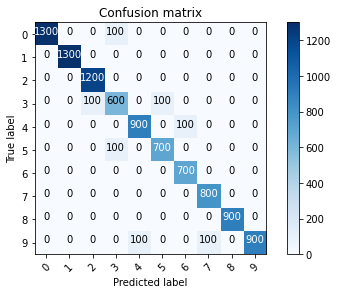

In [63]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

plot_confusion_matrix(cm,list(range(10)))